In [6]:
import pandas as pd
import numpy as np
import yfinance as yf
import json
import ta
import matplotlib.pyplot as plt

#data_tickers = pd.read_excel('S&P_500_V24.01_2024-06-24.xlsx')
# S&P500_Historic_Overview-V24.01-2024-07-12.xlsx
data_tickers = pd.read_excel('S&P500_Historic_Overview-V24.01-2024-07-12.xlsx')
data_tickers = data_tickers.head(66)

#tickers = list(data_tickers['Ticker'])
tickers = list(data_tickers['Symbol'])



# 40 years of Stock Data
# Volatility 
# Co-relation?

tickers

['ABT',
 'ADM',
 'AEP',
 'BA',
 'BMY',
 'CAT',
 'CL',
 'CMS',
 'COP',
 'CPB',
 'CSX',
 'CVS',
 'CVX',
 'DE',
 'DTE',
 'ED',
 'EIX',
 'ETN',
 'ETR',
 'EXC',
 'F',
 'GD',
 'GE',
 'GIS',
 'HAL',
 'HIG',
 'HON',
 'HSY',
 'IBM',
 'IP',
 'KMB',
 'KO',
 'KR',
 'LMT',
 'MMM',
 'MO',
 'MRK',
 'MRO',
 'MSI',
 'NOC',
 'NSC',
 'OXY',
 'PEG',
 'PEP',
 'PFE',
 'PG',
 'PPG',
 'RTX',
 'SLB',
 'SO',
 'SPGI',
 'SW',
 'UNP',
 'XEL',
 'XOM',
 'SHW',
 'CMI',
 'EMR',
 'CLX',
 'NEM',
 'MCD',
 'LLY',
 'BAX',
 'BDX',
 'JNJ',
 'GPC']

In [5]:
data_tickers.head(66)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
1,ADM,Archer-Daniels-Midland,Consumer Staples,Agricultural Products & Services,"Chicago, Illinois",1957-03-04,7084,1902
2,AEP,American Electric Power,Utilities,Electric Utilities,"Columbus, Ohio",1957-03-04,4904,1906
3,BA,Boeing,Industrials,Aerospace & Defense,"Arlington, Virginia",1957-03-04,12927,1916
4,BMY,Bristol Myers Squibb,Health Care,Pharmaceuticals,"New York City, New York",1957-03-04,14272,1989 (1887)
...,...,...,...,...,...,...,...,...
61,LLY,Eli Lilly and Company,Health Care,Pharmaceuticals,"Indianapolis, Indiana",1970-12-31,59478,1876
62,BAX,Baxter International,Health Care,Health Care Equipment,"Deerfield, Illinois",1972-09-30,10456,1931
63,BDX,Becton Dickinson,Health Care,Health Care Equipment,"Franklin Lakes, New Jersey",1972-09-30,10795,1897
64,JNJ,Johnson & Johnson,Health Care,Pharmaceuticals,"New Brunswick, New Jersey",1973-06-30,200406,1886


In [15]:

# One time stock data collection
# Define the stock tickers for each sector

#tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'IBM']  # Apple, Microsoft, Alphabet, IBM
#finance_stocks = ['JPM', 'BAC', 'WFC', 'GS']  # JPMorgan Chase, Bank of America, Wells Fargo, Goldman Sachs
#industrial_stocks = ['MMM', 'GE', 'HON', 'CAT']  # 3M, General Electric, Honeywell, Caterpillar
#fmcg_stocks = ['KO', 'PEP', 'PG', 'CL']  # Coca-Cola, PepsiCo, Procter & Gamble, Colgate-Palmolive
#
## Combine all stock tickers into one list
#all_stocks = tech_stocks + finance_stocks + industrial_stocks + fmcg_stocks
#
## Define the data period
#start_date = '2013-01-01'
#end_date = '2023-03-31'
#
## Download the data
#data = yf.download(all_stocks, start=start_date, end=end_date)['Adj Close']
#
## Save the data to a CSV file
#data.to_csv('stocks_data.csv')
#
## Display the data for verification
#data.head(2)

[*********************100%%**********************]  1 of 1 completed


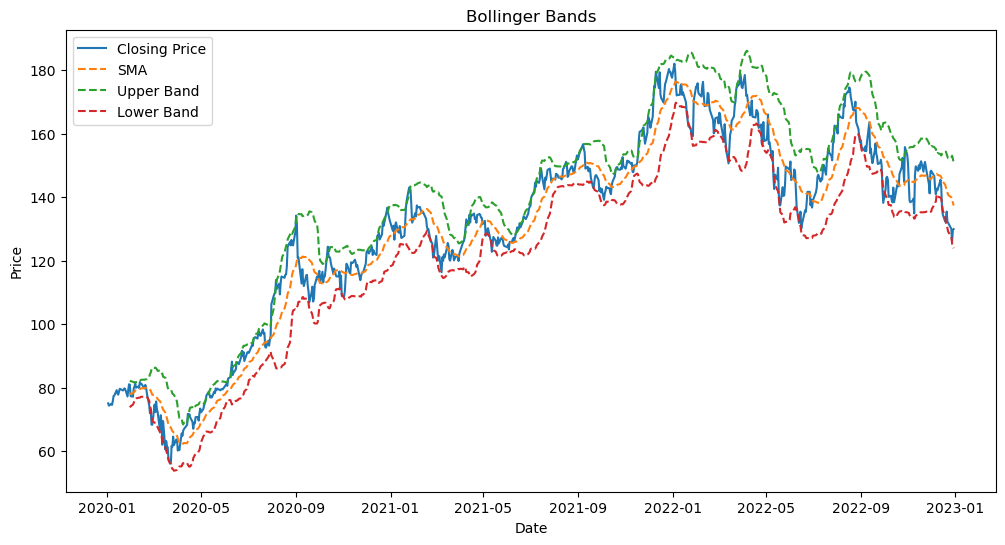

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Fetch historical data for a specific stock
stock_data = yf.download('AAPL', start='2020-01-01', end='2023-01-01')

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    # Calculate the Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()
    
    # Calculate the upper Bollinger Band
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    
    # Calculate the lower Bollinger Band
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    
    return data

stock_data = calculate_bollinger_bands(stock_data)

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    
    # Plot the closing price and Bollinger Bands
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(data['SMA'], label='SMA', linestyle='--')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
    
    # Add title and labels
    plt.title('Bollinger Bands')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()

plot_bollinger_bands(stock_data)

**Need to decide a Threshhold for High Volatile Stocks**

In [7]:
def fetch_data(ticker):
    return yf.download(ticker, start='1974-01-01', end='2023-12-31')

stock_data = {ticker: fetch_data(ticker) for ticker in tickers}

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [23]:
str(stock_data['ABT'].index[0]) > '1974-01-02'

True

In [35]:
pd.Timestamp('1974-01-02')

Timestamp('1974-01-02 00:00:00')

In [34]:
stock_data['ABT'].index[0]

Timestamp('1980-03-17 00:00:00')

In [33]:
import time
import datetime

datetime.datetime.strptime('1974-01-02', "%Y-%m-%d").timestamp()

126313200.0

In [37]:
stock_data['BA'].index[0] 

Timestamp('1974-01-02 00:00:00')

In [38]:
stock_data['ABT'].index[0] > pd.Timestamp('1974-01-02')

True

In [25]:
str(stock_data['BA'].index[0]) > '1974-01-02'

True

In [40]:
# exclude the stocks out of 66 who dont have data from 1974-01-01
stocks_with_50years = []


for key in stock_data.keys():
    try:
        if stock_data[key].index[0] > pd.Timestamp('1974-01-02'):
            pass
        else:
            stocks_with_50years.append(key)
    except:
        print('Error for : ', key)
        continue

Error for :  SW


In [42]:
len(stocks_with_50years)

44

In [43]:
stocks_with_50years

['AEP',
 'BA',
 'BMY',
 'CAT',
 'CL',
 'CMS',
 'CPB',
 'CVS',
 'CVX',
 'DE',
 'DTE',
 'ED',
 'EIX',
 'ETN',
 'ETR',
 'EXC',
 'F',
 'GD',
 'GE',
 'HAL',
 'HON',
 'IBM',
 'IP',
 'KO',
 'KR',
 'MMM',
 'MO',
 'MRK',
 'MRO',
 'MSI',
 'PEP',
 'PFE',
 'PG',
 'RTX',
 'SPGI',
 'XEL',
 'XOM',
 'CMI',
 'EMR',
 'CLX',
 'MCD',
 'LLY',
 'BDX',
 'JNJ']

In [46]:
type(stock_data)

stock_data_filtered = {key: stock_data[key] if key in stock_data else None for key in stocks_with_50years}


In [49]:
len(stock_data_filtered.keys())

44

In [14]:
stock_data['ABT']

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper Band,Lower Band,Band Width
Date,,,,,,,,,,,
1980-03-17,0.000000,0.512028,0.497999,0.501506,0.185148,7513463,NaN,NaN,NaN,NaN,NaN
1980-03-18,0.000000,0.512028,0.494492,0.505013,0.186443,5303621,NaN,NaN,NaN,NaN,NaN
1980-03-19,0.000000,0.515535,0.503260,0.512028,0.189032,2523497,NaN,NaN,NaN,NaN,NaN
1980-03-20,0.000000,0.513781,0.499753,0.499753,0.184501,4654925,NaN,NaN,NaN,NaN,NaN
1980-03-21,0.000000,0.506767,0.499753,0.505013,0.186443,1333034,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,108.860001,109.339996,108.500000,109.029999,107.400551,2565700,104.319302,2.075695,108.470692,100.167911,8.302782
2023-12-26,108.510002,109.730003,108.510002,109.230003,107.597572,2513400,104.640430,2.060400,108.761230,100.519629,8.241601
2023-12-27,109.040001,109.800003,109.040001,109.790001,108.149193,2471800,105.021154,1.963017,108.947187,101.095121,7.852066


In [50]:
import yfinance as yf
import pandas as pd


stock_data = stock_data_filtered


# List of stock tickers
# tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch historical data for each stock
#def fetch_data(ticker):
#    return yf.download(ticker, start='2013-01-01', end='2024-01-01')

#stock_data = {ticker: fetch_data(ticker) for ticker in tickers}

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    data['SMA'] = data['Adj Close'].rolling(window=window).mean()
    data['STD'] = data['Adj Close'].rolling(window=window).std()
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    data['Band Width'] = data['Upper Band'] - data['Lower Band']
    return data

stock_data = {ticker: calculate_bollinger_bands(data) for ticker, data in stock_data.items()}

def calculate_volatility(data):
    return data['Band Width'].mean()

stock_volatility = {ticker: calculate_volatility(data) for ticker, data in stock_data.items()}

# Convert the dictionary to a DataFrame for easy sorting
volatility_df = pd.DataFrame.from_dict(stock_volatility, orient='index', columns=['Volatility'])

# Sort the stocks by volatility
volatility_df = volatility_df.sort_values(by='Volatility', ascending=False)

In [51]:
volatility_df

# BA	7.934089
# MSI	6.123063
# DE	6.047796
# SPGI	5.669231

,Volatility
BA,7.934089
MSI,6.123063
DE,6.047796
SPGI,5.669231
GE,5.357047
LLY,5.003288
CAT,4.877247
CMI,4.789977
BDX,4.686039
IBM,4.482221


In [54]:
stock_data['SPGI']

,Open,High,Low,Close,Adj Close,Volume,SMA,STD,Upper Band,Lower Band,Band Width
Date,,,,,,,,,,,
1974-01-02,0.000000,0.460938,0.429688,0.460938,0.191056,209600,NaN,NaN,NaN,NaN,NaN
1974-01-03,0.000000,0.484375,0.468750,0.484375,0.200771,160000,NaN,NaN,NaN,NaN,NaN
1974-01-04,0.000000,0.492188,0.484375,0.492188,0.204009,108800,NaN,NaN,NaN,NaN,NaN
1974-01-07,0.000000,0.492188,0.468750,0.484375,0.200771,80000,NaN,NaN,NaN,NaN,NaN
1974-01-08,0.000000,0.476563,0.445313,0.468750,0.194294,124800,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,435.130005,436.859985,432.619995,434.839996,433.020905,698500,423.434697,8.910338,441.255372,405.614022,35.641351
2023-12-26,434.510010,438.630005,434.510010,436.230011,434.405121,535100,424.628682,8.686581,442.001843,407.255520,34.746323
2023-12-27,435.290009,440.290009,434.000000,440.000000,438.159332,821100,425.974030,8.588949,443.151928,408.796131,34.355796


In [3]:
import yfinance as yf
import pandas as pd



# List of stock tickers
# tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA']

# Fetch historical data for each stock
def fetch_data(ticker):
    return yf.download(ticker, start='2014-01-01', end='2024-01-01')

stock_data = {ticker: fetch_data(ticker) for ticker in tickers}

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    data['SMA'] = data['Close'].rolling(window=window).mean()
    data['STD'] = data['Close'].rolling(window=window).std()
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    data['Band Width'] = data['Upper Band'] - data['Lower Band']
    return data

stock_data = {ticker: calculate_bollinger_bands(data) for ticker, data in stock_data.items()}

def calculate_volatility(data):
    return data['Band Width'].mean()

stock_volatility = {ticker: calculate_volatility(data) for ticker, data in stock_data.items()}

# Convert the dictionary to a DataFrame for easy sorting
volatility_df = pd.DataFrame.from_dict(stock_volatility, orient='index', columns=['Volatility'])

# Sort the stocks by volatility
volatility_df = volatility_df.sort_values(by='Volatility', ascending=False)

# Display the most volatile stocks
#print(volatility_df)

# save the file 

volatility_df.to_csv('volatility_df.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

[*********************100%%**********************]  1 of 1 completed


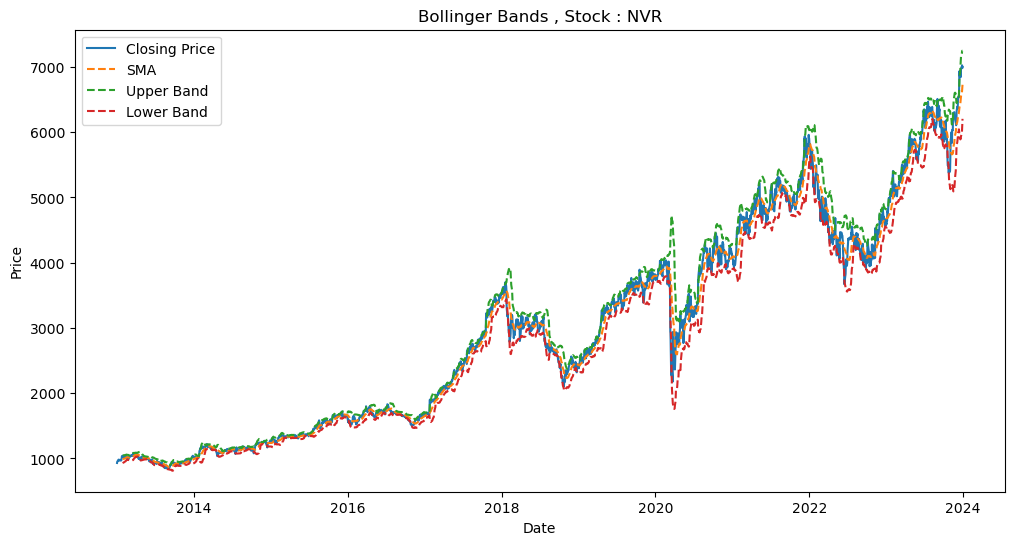

In [12]:
# NVR	332.758744
# BKNG	220.505001
# AZO	110.754999
# MTD	81.909869

# Fetch historical data for a specific stock
stock_data = yf.download('NVR', start='2013-01-01', end='2023-12-31')

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    # Calculate the Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()
    
    # Calculate the upper Bollinger Band
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    
    # Calculate the lower Bollinger Band
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    
    return data

stock_data = calculate_bollinger_bands(stock_data)

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    
    # Plot the closing price and Bollinger Bands
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(data['SMA'], label='SMA', linestyle='--')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
    
    # Add title and labels
    plt.title('Bollinger Bands , Stock : ' + 'NVR' )
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()

plot_bollinger_bands(stock_data)

[*********************100%%**********************]  1 of 1 completed


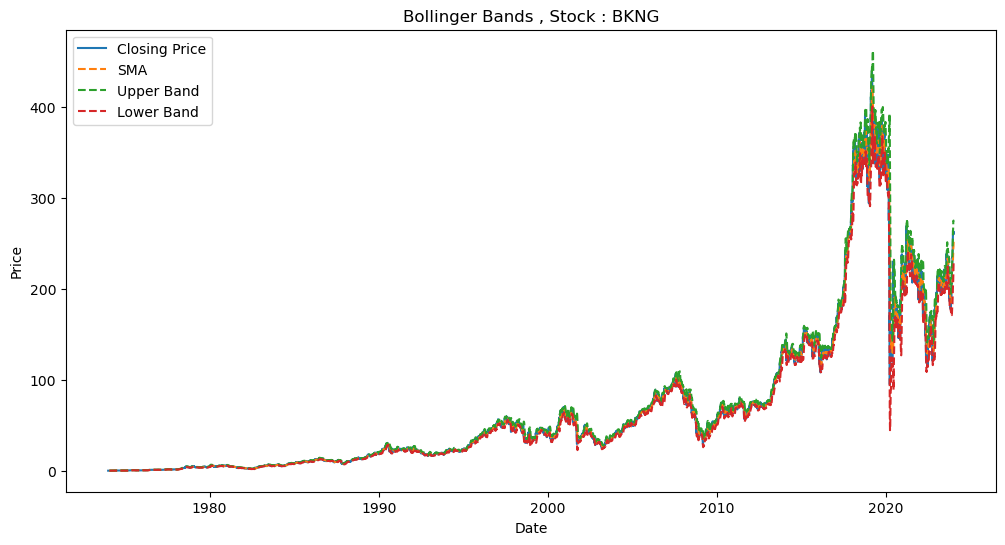

In [55]:
# Fetch historical data for a specific stock
stock_data = yf.download('BA', start='1974-01-01', end='2023-12-31')

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    # Calculate the Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()
    
    # Calculate the upper Bollinger Band
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    
    # Calculate the lower Bollinger Band
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    
    return data

stock_data = calculate_bollinger_bands(stock_data)

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    
    # Plot the closing price and Bollinger Bands
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(data['SMA'], label='SMA', linestyle='--')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
    
    # Add title and labels
    plt.title('Bollinger Bands , Stock : ' + 'BKNG' )
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()

plot_bollinger_bands(stock_data)

[*********************100%%**********************]  1 of 1 completed

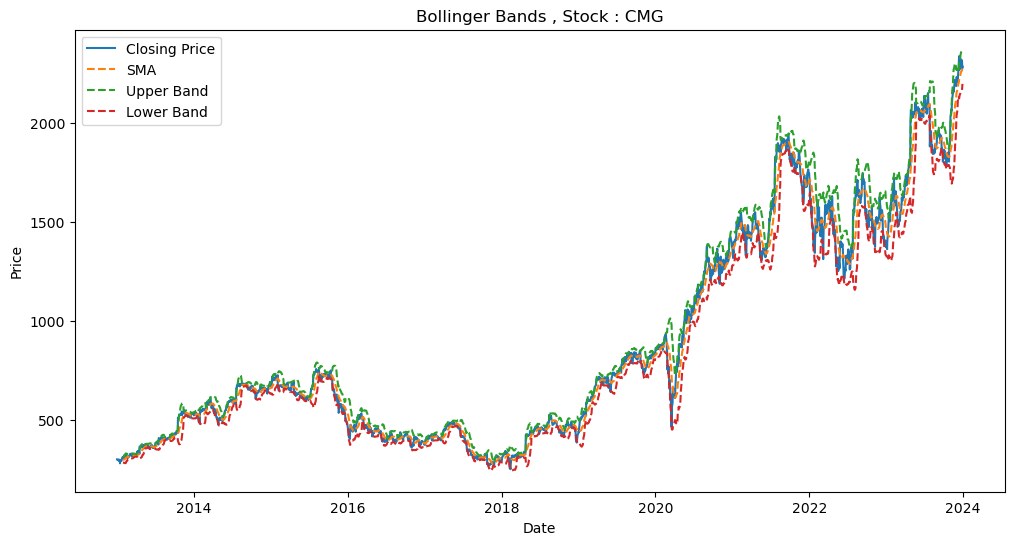

In [10]:
# Fetch historical data for a specific stock
stock_data = yf.download('CMG', start='2013-01-01', end='2023-12-31')

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    # Calculate the Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()
    
    # Calculate the upper Bollinger Band
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    
    # Calculate the lower Bollinger Band
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    
    return data

stock_data = calculate_bollinger_bands(stock_data)

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    
    # Plot the closing price and Bollinger Bands
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(data['SMA'], label='SMA', linestyle='--')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
    
    # Add title and labels
    plt.title('Bollinger Bands , Stock : ' + 'CMG' )
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()

plot_bollinger_bands(stock_data)

[*********************100%%**********************]  1 of 1 completed


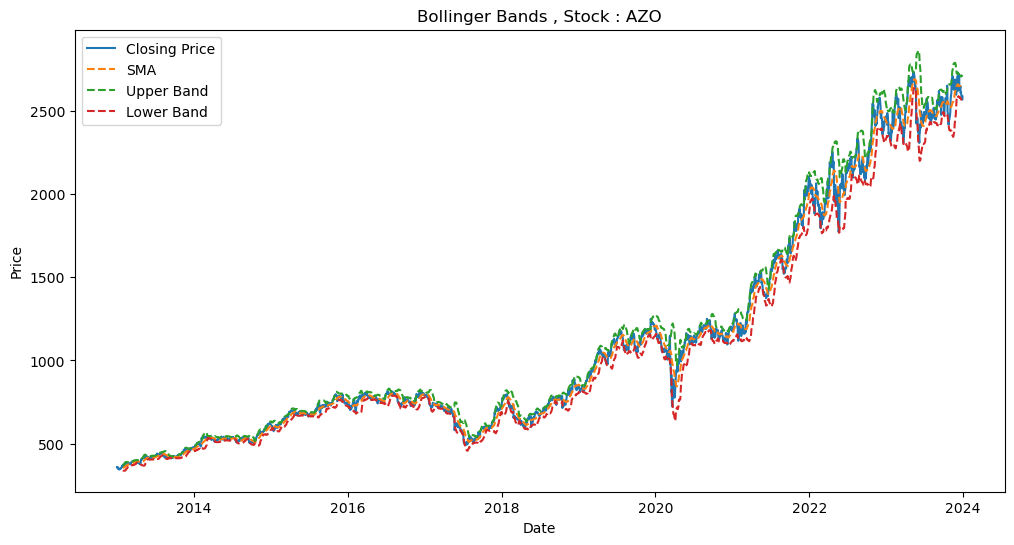

In [11]:
# Fetch historical data for a specific stock
stock_data = yf.download('AZO', start='2013-01-01', end='2023-12-31')

def calculate_bollinger_bands(data, window=20, num_of_std=2):
    # Calculate the Simple Moving Average (SMA)
    data['SMA'] = data['Close'].rolling(window=window).mean()
    
    # Calculate the standard deviation
    data['STD'] = data['Close'].rolling(window=window).std()
    
    # Calculate the upper Bollinger Band
    data['Upper Band'] = data['SMA'] + (data['STD'] * num_of_std)
    
    # Calculate the lower Bollinger Band
    data['Lower Band'] = data['SMA'] - (data['STD'] * num_of_std)
    
    return data

stock_data = calculate_bollinger_bands(stock_data)

def plot_bollinger_bands(data):
    plt.figure(figsize=(12, 6))
    
    # Plot the closing price and Bollinger Bands
    plt.plot(data['Close'], label='Closing Price')
    plt.plot(data['SMA'], label='SMA', linestyle='--')
    plt.plot(data['Upper Band'], label='Upper Band', linestyle='--')
    plt.plot(data['Lower Band'], label='Lower Band', linestyle='--')
    
    # Add title and labels
    plt.title('Bollinger Bands , Stock : ' + 'AZO' )
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    
    # Show plot
    plt.show()

plot_bollinger_bands(stock_data)

In [17]:
raw_data = yf.download (tickers = "^GSPC", start = "2023-01-01", 
                              end = "2024-01-31", interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [18]:
raw_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-03,3853.290039,3878.459961,3794.330078,3824.139893,3824.139893,3959140000
2023-01-04,3840.360107,3873.159912,3815.770020,3852.969971,3852.969971,4414080000
2023-01-05,3839.739990,3839.739990,3802.419922,3808.100098,3808.100098,3893450000
2023-01-06,3823.370117,3906.189941,3809.560059,3895.080078,3895.080078,3923560000
2023-01-09,3910.820068,3950.570068,3890.419922,3892.090088,3892.090088,4311770000
...,...,...,...,...,...,...
2024-01-24,4888.560059,4903.680176,4865.939941,4868.549805,4868.549805,4330030000
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4894.160156,4020430000
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4890.970215,3353400000


In [ ]:
import yfinance as yf
import pandas as pd
import ta

# Define stock lists
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'IBM']
finance_stocks = ['JPM', 'BAC', 'WFC', 'GS']
industrial_stocks = ['MMM', 'GE', 'HON', 'CAT']
fmcg_stocks = ['KO', 'PEP', 'PG', 'CL']

# Combine all stock tickers into one list
all_stocks = tech_stocks + finance_stocks + industrial_stocks + fmcg_stocks

# Define the data period
start_date = '2015-01-01'
end_date = '2023-03-31'

# Download the full stock data (Open, High, Low, Close, Volume, and Adj Close)
data = yf.download(all_stocks, start=start_date, end=end_date)

# Initialize a dictionary to store all indicators
all_indicators = {}

# Calculate indicators for each stock
for stock in all_stocks:
    # Extract the stock data from the MultiIndex DataFrame
    stock_data = data.xs(stock, level=1, axis=1)
    
    # Calculate indicators
    stock_data['SMA'] = ta.trend.SMAIndicator(stock_data['Adj Close'], window=14).sma_indicator()
    stock_data['EMA'] = ta.trend.EMAIndicator(stock_data['Adj Close'], window=14).ema_indicator()
    stock_data['RSI'] = ta.momentum.RSIIndicator(stock_data['Adj Close'], window=14).rsi()
    macd = ta.trend.MACD(stock_data['Adj Close'])
    stock_data['MACD'] = macd.macd()
    stock_data['MACD_Signal'] = macd.macd_signal()
    stock_data['MACD_Diff'] = macd.macd_diff()
    stock_data['OBV'] = ta.volume.OnBalanceVolumeIndicator(stock_data['Adj Close'], stock_data['Volume']).on_balance_volume()
    stock_data['ATR'] = ta.volatility.AverageTrueRange(stock_data['High'], stock_data['Low'], stock_data['Adj Close']).average_true_range()
    bollinger = ta.volatility.BollingerBands(stock_data['Adj Close'])
    stock_data['Bollinger_High'] = bollinger.bollinger_hband()
    stock_data['Bollinger_Low'] = bollinger.bollinger_lband()
    stock_data['ADX'] = ta.trend.ADXIndicator(stock_data['High'], stock_data['Low'], stock_data['Adj Close']).adx()
    stock_data['CCI'] = ta.trend.CCIIndicator(stock_data['High'], stock_data['Low'], stock_data['Adj Close']).cci()
    stock_data['Williams %R'] = ta.momentum.WilliamsRIndicator(stock_data['High'], stock_data['Low'], stock_data['Adj Close']).williams_r()
    
    # Store the calculated indicators
    all_indicators[stock] = stock_data

# Combine all indicators into a single DataFrame
combined_indicators = pd.concat(all_indicators, axis=1, keys=all_stocks)

# Display the combined DataFrame
combined_indicators.head(10)

combined_indicators.to_csv('combined_data.csv')

In [9]:
combined_indicators.head(20)

AAPL                                                         \
Price       Adj Close      Close       High        Low       Open     Volume   
Date                                                                           
2015-01-02  24.402172  27.332500  27.860001  26.837500  27.847500  212818400   
2015-01-05  23.714725  26.562500  27.162500  26.352501  27.072500  257142000   
2015-01-06  23.716951  26.565001  26.857500  26.157499  26.635000  263188400   
2015-01-07  24.049519  26.937500  27.049999  26.674999  26.799999  160423600   
2015-01-08  24.973553  27.972500  28.037500  27.174999  27.307501  237458000   
2015-01-09  25.000336  28.002501  28.312500  27.552500  28.167500  214798000   
2015-01-12  24.384308  27.312500  28.157499  27.200001  28.150000  198603200   
2015-01-13  24.600811  27.555000  28.200001  27.227501  27.857500  268367600   
2015-01-14  24.507072  27.450001  27.622499  27.125000  27.260000  195826400   
2015-01-15  23.841948  26.705000  27.514999  26.665001  27.500000  240056000   
2015-01-16  23.656689  26.497499  26.895000  26.299999  26.757500  314053200   
2015-01-20  24.266016  27.180000  27.242500  26.625000  26.959999  199599600   
2015-01-21  24.451273  27.387501  27.764999  27.067499  27.237499  194303600   
2015-01-22  25.087389  28.100000  28.117500  27.430000  27.565001  215185600   
2015-01-23  25.216843  28.245001  28.437500  27.882500  28.075001  185859200   
2015-01-26  25.243631  28.275000  28.590000  28.200001  28.434999  222460000   
2015-01-27  24.359766  27.285000  28.120001  27.257500  28.105000  382274800   
2015-01-28  25.736898  28.827499  29.530001  28.827499  29.407499  585908400   
2015-01-29  26.538172  29.725000  29.797501  28.889999  29.080000  337745600   
2015-01-30  26.149805  29.290001  30.000000  29.212500  29.600000  334982000   

                                                  ...   CL              \
Price             SMA        EMA        RSI MACD  ... MACD MACD_Signal   
Date                                              ...                    
2015-01-02        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-05        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-06        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-07        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-08        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-09        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-12        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-13        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-14        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-15        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-16        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-20        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-21        NaN        NaN        NaN  NaN  ...  NaN         NaN   
2015-01-22  24.332340  24.395684  60.986533  NaN  ...  NaN         NaN   
2015-01-23  24.390531  24.505172  62.490233  NaN  ...  NaN         NaN   
2015-01-26  24.499738  24.603633  62.809680  NaN  ...  NaN         NaN   
2015-01-27  24.545654  24.571118  48.218585  NaN  ...  NaN         NaN   
2015-01-28  24.666181  24.726555  62.741672  NaN  ...  NaN         NaN   
2015-01-29  24.777939  24.968104  68.310787  NaN  ...  NaN         NaN   
2015-01-30  24.860044  25.125664  63.366871  NaN  ...  NaN         NaN   

                                                                             \
Price      MACD_Diff       OBV        ATR Bollinger_High Bollinger_Low  ADX   
Date                                                                          
2015-01-02       NaN   2522800   0.000000            NaN           NaN  0.0   
2015-01-05       NaN   -427900   0.000000            NaN           NaN  0.0   
2015-01-06       NaN  -3865300   0.000000            NaN           NaN  0.0   

In [15]:
with open('AAPL_news.json', 'r') as file:
    news = json.load(file)


# Normalize the JSON data into a flat table
pd.json_normalize(news['articles'])

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,Joe Rossignol,"Apple Becomes $3 Trillion Company Again, But N...",Fans of large numbers will be happy to know th...,https://www.macrumors.com/2024/06/05/aapl-vs-n...,https://images.macrumors.com/t/hTWtXD99jUuYkTy...,2024-06-05T20:29:18Z,Fans of large numbers will be happy to know th...,None,MacRumors
1,Ben Lovejoy,"Nvidia overtakes AAPL to exceed $3T value, win...",Nvidia has overtaken AAPL in the market cap st...,https://9to5mac.com/2024/06/06/nvidia-overtake...,https://i0.wp.com/9to5mac.com/wp-content/uploa...,2024-06-06T11:06:46Z,Nvidia has overtaken AAPL in the market cap st...,None,9to5Mac
2,Julie Hyman,Investors won't want to own Apple in four year...,Apple (AAPL) shares are rising to intraday hig...,https://finance.yahoo.com/video/investors-avoi...,https://s.yimg.com/ny/api/res/1.2/Phs2ctLejX93...,2024-06-11T20:25:59Z,Apple (AAPL) shares are rising to intraday hig...,None,Yahoo Entertainment
3,Seana Smith,Apple wants to redefine AI as 'Apple intellige...,Apple's (AAPL) Worldwide Developers Conference...,https://finance.yahoo.com/video/apple-wants-re...,https://s.yimg.com/ny/api/res/1.2/g.dSjj25.vTj...,2024-06-10T14:17:22Z,Apple's (AAPL) Worldwide Developers Conference...,None,Yahoo Entertainment
4,Benjamin Mayo,Apple stock hits record high as investors reac...,Apple investors are reacting strongly to the c...,https://9to5mac.com/2024/06/11/apple-stock-hit...,https://i0.wp.com/9to5mac.com/wp-content/uploa...,2024-06-11T15:43:39Z,Apple investors are reacting strongly to the c...,None,9to5Mac
...,...,...,...,...,...,...,...,...,...
95,applech2,elago、AppleのVision Proを保護するシリコン製の「Silicone Tra...,elagoがAppleのVision Proを保護するシリコン製の「Silicone Tra...,https://applech2.com/archives/20240602-elago-s...,https://applech2.com/wp-content/uploads/2024/0...,2024-06-01T23:48:24Z,elagoAppleVision ProSilicone TraySilicone Batt...,None,Applech2.com
96,applech2,シングルファイルのリピート機能や外部オーディオファイルの読み込みメニューなどをサポートしたM...,シングルファイルのリピート機能や外部オーディオファイルの読み込みメニューなどをサポートしたM...,https://applech2.com/archives/20240603-iina-fo...,https://applech2.com/wp-content/uploads/2024/0...,2024-06-02T20:15:12Z,MacIINA v1.3.5\r\nLinuxmpvFFmpegMacIINA for Ma...,None,Applech2.com
97,applech2,Apple、2024 Apple Design Awardの受賞者を発表。,AppleがApple Design Award 2024の受賞者を発表しています。詳細は以...,https://applech2.com/archives/20240607-apple-d...,https://applech2.com/wp-content/uploads/2024/0...,2024-06-06T22:32:42Z,AppleApple Design Award 2024\r\nApple202405290...,None,Applech2.com
98,applech2,米Kensington、Bluetoothと2.4GHz接続で最大3台のデバイスと接続できる...,KensingtonがBluetoothと2.4GHz接続で最大3台のデバイスと接続できるエ...,https://applech2.com/archives/20240607-kensing...,https://applech2.com/wp-content/uploads/2024/0...,2024-06-07T07:47:49Z,KensingtonBluetooth2.4GHz3Pro Fit Ergo Wireles...,None,Applech2.com


In [7]:
data.head(2)

Ticker,AAPL,BAC,CAT,CL,GE,GOOGL,GS,HON,IBM,JPM,KO,MMM,MSFT,PEP,PG,WFC
Date,,,,,,,,,,,,,,,,
2015-01-02,24.402172,14.708727,70.907631,55.241547,99.899513,26.447147,161.304260,78.936691,103.354813,48.268318,31.106474,92.933609,40.378063,71.740623,69.090263,41.823158
2015-01-05,23.714722,14.281434,67.164665,54.833481,98.065781,25.943224,156.267914,77.432449,101.728539,46.769829,31.106474,90.837677,40.006760,71.201271,68.761765,40.676266


In [14]:
import requests

api_key = '28838b5ff11a41a6b92520fce55b544a'


def get_news_sentiment(api_key, query, from_date, to_date):
    url = f"https://newsapi.org/v2/everything?q={query}&from={from_date}&to={to_date}&apiKey={api_key}"
    response = requests.get(url)
    articles = response.json().get('articles', [])
    
    return [article['title'] for article in articles]

news_sentiment_data = get_news_sentiment(api_key, 'AAPL', '2023-01-01', '2023-12-31')

In [19]:
from newsapi import NewsApiClient
api = NewsApiClient(api_key='28838b5ff11a41a6b92520fce55b544a')
text = api.get_everything(q='AAPL')

